### DFT result of a convolution between a cosine and A square wave with a frequency

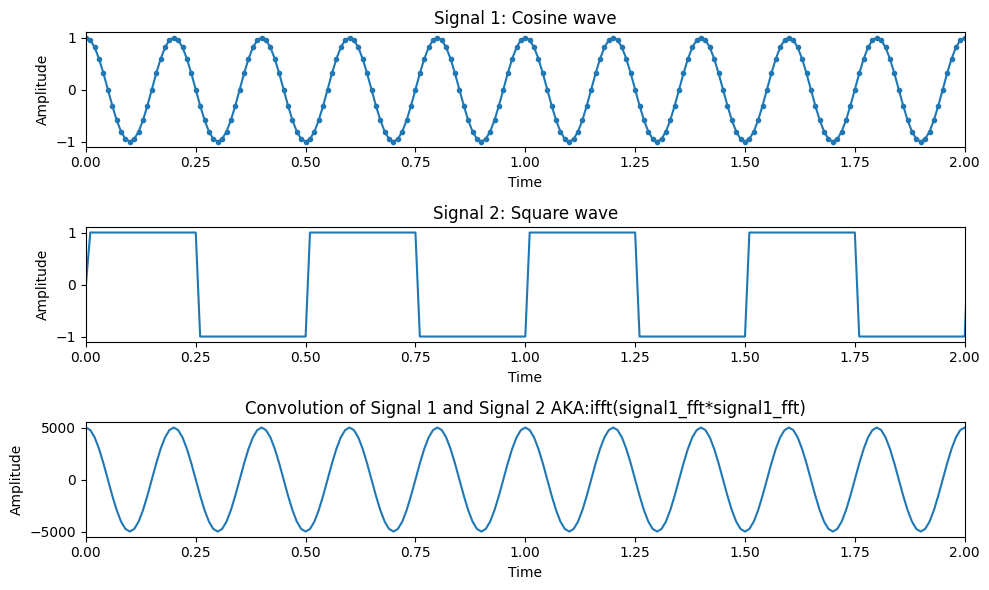

<ipython-input-26-8465faaeb99b>:75: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


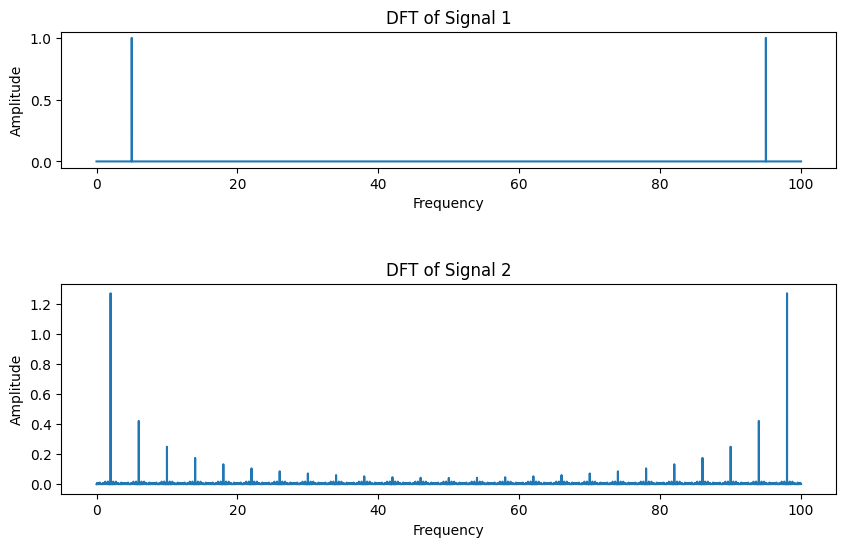

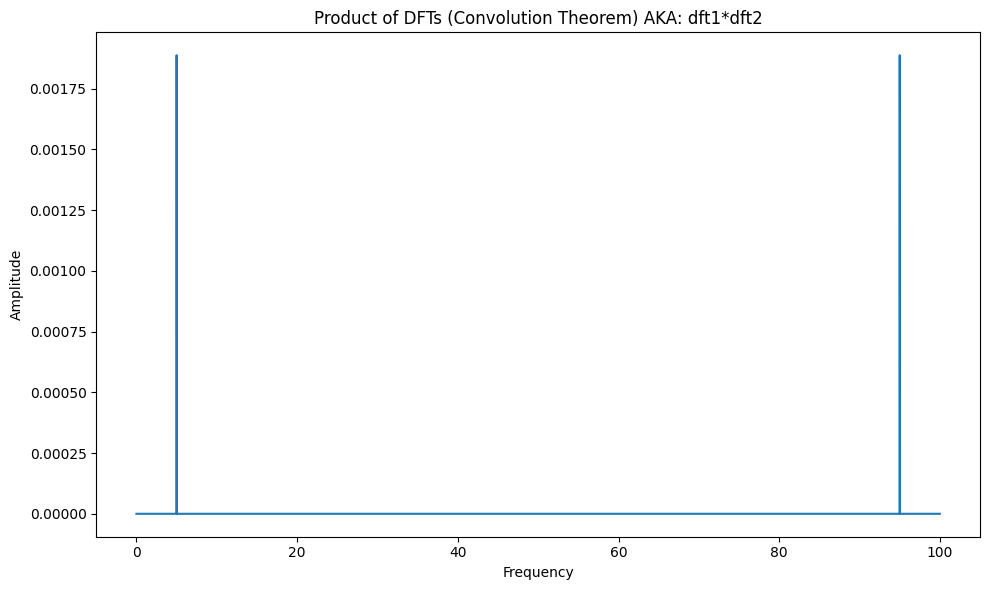

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signals
T = 100  # Signal duration (or 20 sec)
Fs = 100  # Hz
N = int(T * Fs)

t = np.arange(0, T, 1/Fs)

# Signal 1: A cosine wave with frequency 10 Hz
f1 = 5
signal1 = np.cos(2 * np.pi * f1 * t)

# Signal 2: A square wave with frequency 5 Hz
f2 = 2
signal2 = np.sign(np.sin(2 * np.pi * f2 * t))

# Compute FFT of the signals
signal1_fft = np.fft.fft(signal1)
signal2_fft = np.fft.fft(signal2)
convolved_fft = np.fft.ifft(signal1_fft*signal1_fft)


signal1_fft = signal1_fft / (N / 2)
signal2_fft = signal2_fft / (N / 2)



# Plot the signals in the time domain
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal1,'.-')
plt.title("Signal 1: Cosine wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim((0,2))

plt.subplot(3, 1, 2)
plt.plot(t, signal2)
plt.title("Signal 2: Square wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim((0,2))


plt.subplot(3, 1, 3)
plt.plot(t, convolved_fft)
plt.title("Convolution of Signal 1 and Signal 2 AKA:ifft(signal1_fft*signal1_fft)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim((0,2))


plt.tight_layout()
plt.show()

# Plot the DFTs
freq = np.arange(0, N/T, 1/T)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(freq, np.abs(signal1_fft))
plt.title("DFT of Signal 1")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(signal2_fft))
plt.title("DFT of Signal 2")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")


plt.tight_layout()
plt.show()

# Plot the multiplication of the DFTs
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)
plt.plot(freq, np.abs(signal1_fft) * np.abs(signal2_fft))
plt.title("Product of DFTs (Convolution Theorem) AKA: dft1*dft2")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")



plt.tight_layout()
plt.show()


### *Low*-pass filter example

<ipython-input-1-9548fb00bfc7>:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  signal = 2*np.sum(np.sin(2 * np.pi * f * t) for f in frequencyArray)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


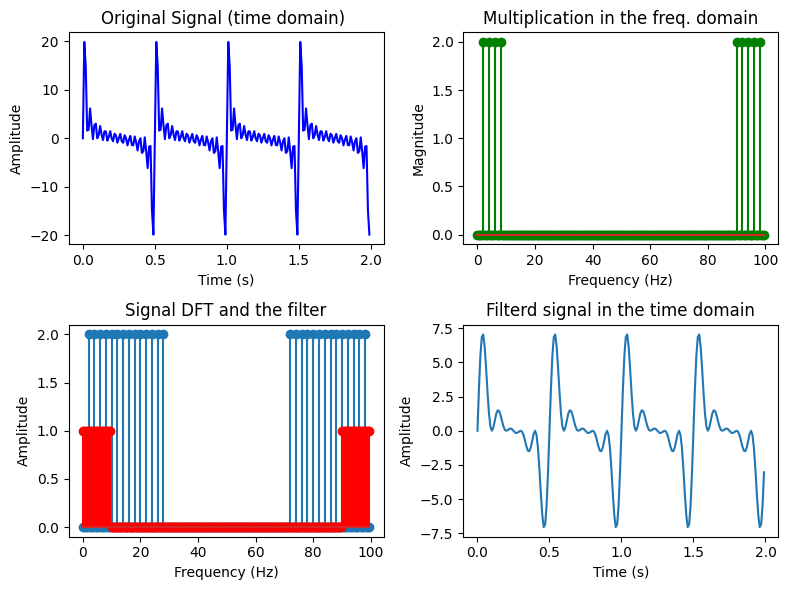

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the signal
T = 2  # signal duration
Fs = 100  # Hz
N = T*Fs

t = np.arange(0, T, 1/Fs)
frequencyArray = np.arange(2, 30, 2)
# A signal that contains the sum of sines
signal = 2*np.sum(np.sin(2 * np.pi * f * t) for f in frequencyArray)

# The filter
H = np.concatenate((np.ones(20), np.zeros(160), np.ones(20)))

# FFT
dft = np.fft.fft(signal)

#Multiplication in the freqDomain
filteredSignal = np.fft.ifft(dft*H)

# Normalize DFT coefficients by N/2
normalized_dft = dft/(N/2)

# Take the absolute values of X (the DFT)
normalized_dft = np.abs(normalized_dft)

# Determine the corresponding frequencies
frequencyVec = np.arange(0,(N)/T, 1/T)


# Plot the signal and DFT coefficients
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot the original signal
axs[0,0].plot(t, signal, 'b-')
axs[0,0].set_xlabel('Time (s)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_title('Original Signal (time domain) ')

# Plot the DFT of the signal and the filter in the freq. domain
axs[1,0].stem(frequencyVec, normalized_dft)
axs[1,0].stem(frequencyVec, H, 'r')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_title('Signal DFT and the filter')

# Plot the multiplication in the freq domain
axs[0,1].stem(frequencyVec, normalized_dft*H, 'g')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Magnitude')
axs[0,1].set_title('Multiplication in the freq. domain')

# Plot the inverse DFT after multilication
axs[1,1].plot(t, filteredSignal)
axs[1,1].set_xlabel('Time (s)')
axs[1,1].set_ylabel('Amplitude')
axs[1,1].set_title('Filterd signal in the time domain')

plt.tight_layout()
plt.show()

### High-pass filter example

<ipython-input-2-efd47d396bde>:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  signal = 2*np.sum(np.sin(2 * np.pi * f * t) for f in frequencyArray)


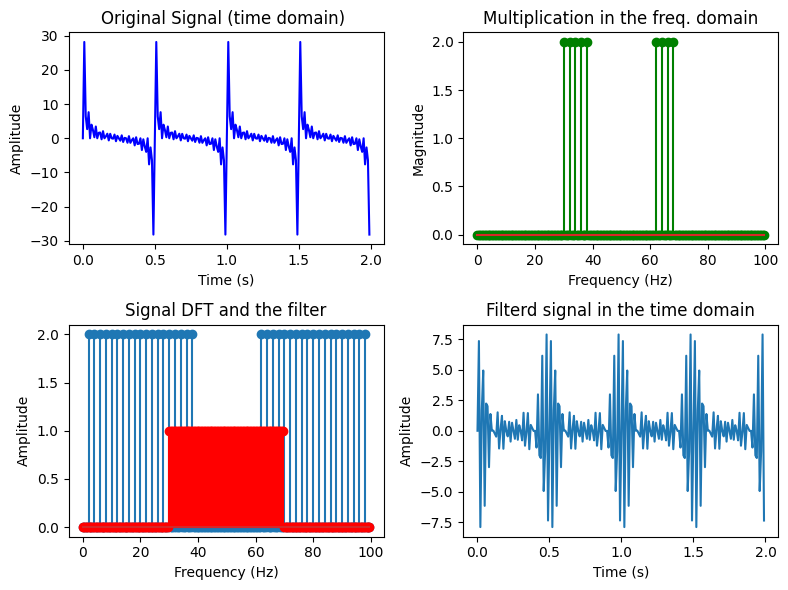

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the signal
T = 2  # signal duration
Fs = 100  # Hz
N = T*Fs

t = np.arange(0, T, 1/Fs)
frequencyArray = np.arange(2, 40, 2)
# A signal that contains the sum of sines
signal = 2*np.sum(np.sin(2 * np.pi * f * t) for f in frequencyArray)

# The filter
H = np.concatenate((np.zeros(60), np.ones(80), np.zeros(60)))

# FFT
dft = np.fft.fft(signal)

#Multiplication in the freqDomain
filteredSignal = np.fft.ifft(dft*H)

# Normalize DFT coefficients by N/2
normalized_dft = dft/(N/2)

# Take the absolute values of X (the DFT)
normalized_dft = np.abs(normalized_dft)

# Determine the corresponding frequencies
frequencyVec = np.arange(0,(N)/T, 1/T)


# Plot the signal and DFT coefficients
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot the original signal
axs[0,0].plot(t, signal, 'b-')
axs[0,0].set_xlabel('Time (s)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_title('Original Signal (time domain) ')

# Plot the DFT of the signal and the filter in the freq. domain
axs[1,0].stem(frequencyVec, normalized_dft)
axs[1,0].stem(frequencyVec, H, 'r')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_title('Signal DFT and the filter')

# Plot the multiplication in the freq domain
axs[0,1].stem(frequencyVec, normalized_dft*H, 'g')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Magnitude')
axs[0,1].set_title('Multiplication in the freq. domain')

# Plot the inverse DFT after multilication
axs[1,1].plot(t, filteredSignal)
axs[1,1].set_xlabel('Time (s)')
axs[1,1].set_ylabel('Amplitude')
axs[1,1].set_title('Filterd signal in the time domain')

plt.tight_layout()
plt.show()

### Band pass filter

<ipython-input-3-1ab42629c671>:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  signal = 2*np.sum(np.sin(2 * np.pi * f * t) for f in frequencyArray)


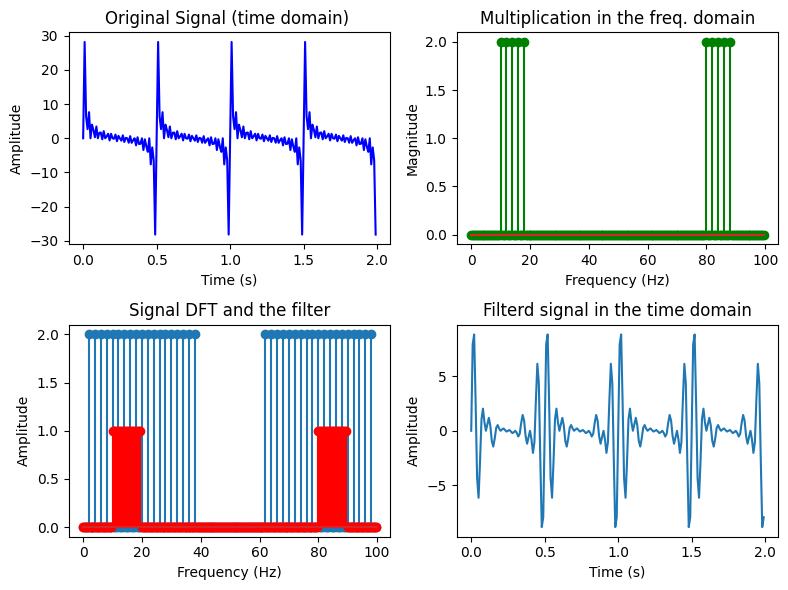

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the signal
T = 2  # signal duration
Fs = 100  # Hz
N = T*Fs

t = np.arange(0, T, 1/Fs)
frequencyArray = np.arange(2, 40, 2)
# A signal that contains the sum of sines
signal = 2*np.sum(np.sin(2 * np.pi * f * t) for f in frequencyArray)

# The filter
H = np.concatenate((np.zeros(20), np.ones(20),np.zeros(60), np.zeros(60), np.ones(20), np.zeros(20)))

# FFT
dft = np.fft.fft(signal)

#Multiplication in the freqDomain
filteredSignal = np.fft.ifft(dft*H)

# Normalize DFT coefficients by N/2
normalized_dft = dft/(N/2)

# Take the absolute values of X (the DFT)
normalized_dft = np.abs(normalized_dft)

# Determine the corresponding frequencies
frequencyVec = np.arange(0,(N)/T, 1/T)


# Plot the signal and DFT coefficients
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot the original signal
axs[0,0].plot(t, signal, 'b-')
axs[0,0].set_xlabel('Time (s)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_title('Original Signal (time domain) ')

# Plot the DFT of the signal and the filter in the freq. domain
axs[1,0].stem(frequencyVec, normalized_dft)
axs[1,0].stem(frequencyVec, H, 'r')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_title('Signal DFT and the filter')

# Plot the multiplication in the freq domain
axs[0,1].stem(frequencyVec, normalized_dft*H, 'g')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Magnitude')
axs[0,1].set_title('Multiplication in the freq. domain')

# Plot the inverse DFT after multilication
axs[1,1].plot(t, filteredSignal)
axs[1,1].set_xlabel('Time (s)')
axs[1,1].set_ylabel('Amplitude')
axs[1,1].set_title('Filterd signal in the time domain')

plt.tight_layout()
plt.show()

### spectrogram

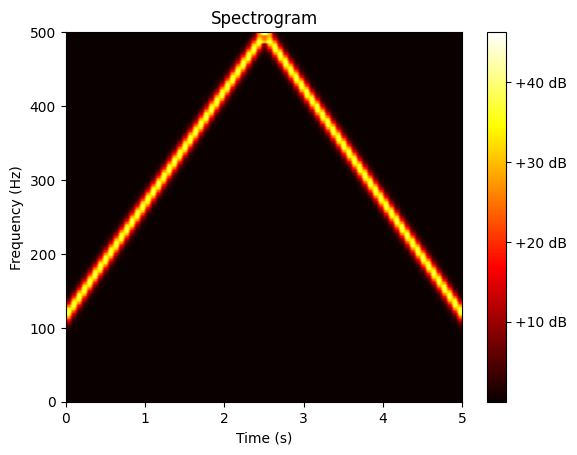

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a chirp input signal
sample_rate = 1000  # Sample rate in Hz
duration = 5  # Duration of the signal in seconds
t = np.arange(0, duration, 1/sample_rate)

# create the chirp signal
f_start = 100  # Starting frequency in Hz
f_end = 500  # Ending frequency in Hz
input_signal = np.sin(2 * np.pi * (f_start + (f_end - f_start) * t / duration) * t)

# Define spectrogram parameters
window_size = 256#1024
hop_size = 64#256

# Calculate the number of frames
num_frames = int((len(input_signal) - window_size) / hop_size) + 1

# Create a window function (Hann window)
window = np.hanning(window_size)

# Initialize the spectrogram matrix
spectrogram = np.zeros((window_size // 2 + 1, num_frames), dtype=np.complex64)

# Calculate the spectrogram frame by frame
for frame_idx in range(num_frames):
    start = frame_idx * hop_size
    end = start + window_size

    # Apply the window function to the input signal
    frame = input_signal[start:end] * window

    # Compute the Fourier transform of the frame
    spectrum = np.fft.fft(frame, axis=0)[:window_size // 2 + 1]

    # Store the spectrum in the spectrogram matrix
    spectrogram[:, frame_idx] = spectrum

# Convert the complex spectrogram to magnitude
spectrogram = np.abs(spectrogram)

# Display the spectrogram
plt.imshow(spectrogram, aspect='auto', origin='lower', cmap='hot',
           extent=[0, duration, 0, sample_rate / 2])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


In [ ]:
!pip install scipy

In [ ]:
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio

# Generate a chirp input signal
sample_rate = 1000  # Sample rate in Hz
duration = 5  # Duration of the signal in seconds
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
f_start = 100  # Starting frequency in Hz
f_end = 500  # Ending frequency in Hz
input_signal = np.sin(2 * np.pi * (f_start + (f_end - f_start) * t / duration) * t)

# Save the chirp signal as a WAV file
wavfile.write("chirp.wav", sample_rate, input_signal)

# Play the saved WAV file
Audio("chirp.wav")
